# **TUTORIAL** 
## *First steps toward enhanced sampling* 
**Author: Luca Sagresti** 

\* mail me: luca.sagresti[at]sns.it

The first part is partially taken from a PLUMED masterclass held by 
Prof. B. Ensing  
  
  
The second part is partially taken from the Lugano course on PLUMED held in 2018

#### Useful libraries for the tutorial

In [ ]:
import numpy as np
import matplotlib.pyplot as plt; import matplotlib as mpl
import glob

#### Useful parameters for nice matplotlib plot

In [ ]:
mpl.rcParams['figure.dpi']=200
mpl.rcParams['figure.titlesize']=8
mpl.rcParams['axes.facecolor']='white'        
mpl.rcParams['lines.linewidth']=1.0
mpl.rcParams['axes.linewidth']=2.0
mpl.rcParams['xtick.major.pad']=8
mpl.rcParams['ytick.major.pad']=8
mpl.rcParams['ytick.minor.pad']=6
mpl.rcParams['xtick.labelsize']=6
mpl.rcParams['ytick.labelsize']=6
mpl.rcParams['axes.titlesize']=10
mpl.rcParams['axes.labelsize']=8
mpl.rc('text',usetex=False)
mpl.rcParams['axes.grid']='False'
mpl.rcParams['axes.axisbelow']='line'
mpl.rcParams['legend.loc']='best'
mpl.rcParams['legend.fontsize']=10

### Load Data

In [ ]:
##@title **Upload data**
base = "https://raw.githubusercontent.com/lianctrl/HandsOnSession27-01-23/main/First-Part/Data-LD/"

Potential = "potential.dat" #@param {type:"string"}
dynamic1 = "trajA.dat" #@param {type:"string"}
dynamic2 = "trajB.dat" #@param {type:"string"}
dynamic3 = "trajC.dat" #@param {type:"string"}
dynamic4 = "trajD.dat" #@param {type:"string"}

!wget -O potential.dat {base+Potential} 
!wget -O LD1.dat {base+dynamic1}
!wget -O LD2.dat {base+dynamic2}
!wget -O LD3.dat {base+dynamic3}
!wget -O LD4.dat {base+dynamic4}

--2023-01-26 13:57:05--  https://raw.githubusercontent.com/lianctrl/HandsOnSession27-01-23/main/First-Part/Data-LD/potential.dat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 400211 (391K) [text/plain]
Saving to: ‘potential.dat’

potential.dat       100%[===================>] 390.83K  --.-KB/s    in 0.04s   

2023-01-26 13:57:05 (8.98 MB/s) - ‘potential.dat’ saved [400211/400211]

--2023-01-26 13:57:05--  https://raw.githubusercontent.com/lianctrl/HandsOnSession27-01-23/main/First-Part/Data-LD/trajA.dat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting resp

### Read and plot Muller-Brown potential

Potential grid size: 100 x 100


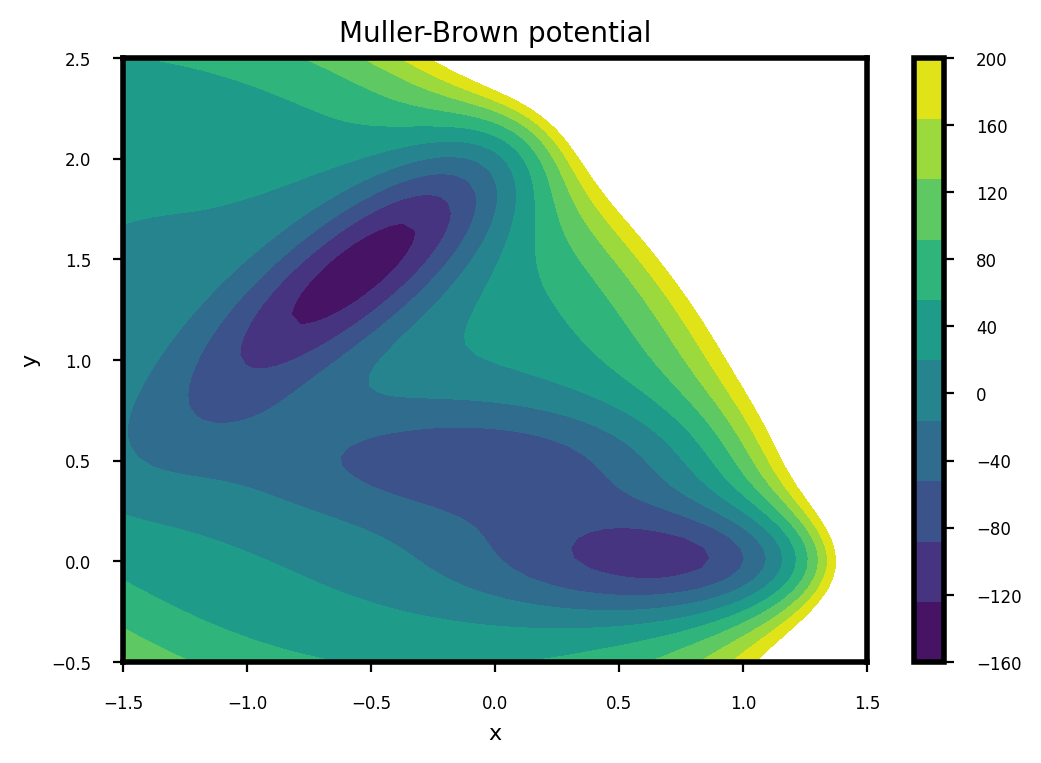

In [ ]:
# read and plot 2D Muller-Brown potential energy surface
try:
    filename="potential.dat"
    with open(filename, "r") as infile:
 
        # read grid size from header
        try:
            line = infile.readline()
            nx = int(line.split()[1])
            ny = int(line.split()[2])
            print(f"Potential grid size: {nx} x {ny}")
        except:
            print(f"Error: wrong header in file {filename}")        

        # declare arrays
        xgrid = np.empty(nx)
        ygrid = np.empty(ny)
        vpot = np.empty([nx, ny])
        
        for i in range(nx):
            for j in range(ny):
                line = infile.readline()
                xgrid[i], ygrid[j], vpot[j][i] = [float(val) for val in line.split()]
                
            line = infile.readline()  # read empty line


except:
    print(f"Error: Failed to open and read file {filename}")        

    
# make potential contour plot
vmin = -160
vmax = 200
vfreq = 40

x, y = np.meshgrid(xgrid, ygrid)
levels = np.linspace(vmin, vmax, 11)

fig,ax=plt.subplots(1,1)
cp = ax.contourf(x, y, vpot, levels=levels, vmin=vmin, vmax=vmax)
fig.colorbar(mappable=cp, ticks=range(vmin, vmax+vfreq, vfreq))
ax.set_title('Muller-Brown potential')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim(-1.5,1.5)
ax.set_ylim(-0.5,2.5)
plt.show()


### Langevin Dynamics
We are going to analyze some langevin dynamics on the above illustrated 2D potential.  
Theoretical recall:  
Mẍ=-∇U(x)-γẋ+√(2γkT)R(t)

In [ ]:
# function to open and read colvar file
def read_colvar(filename, cv1, cv2):
    with open(filename, "r") as infile:
        line = infile.readline()
        n = 0
        for line in infile:
            cv1[n] = float(line.split()[1])
            cv2[n] = float(line.split()[2])
            n += 1
    return n

In [ ]:
datafiles=[]

for name in glob.glob('LD*'):
    datafiles.append(name)

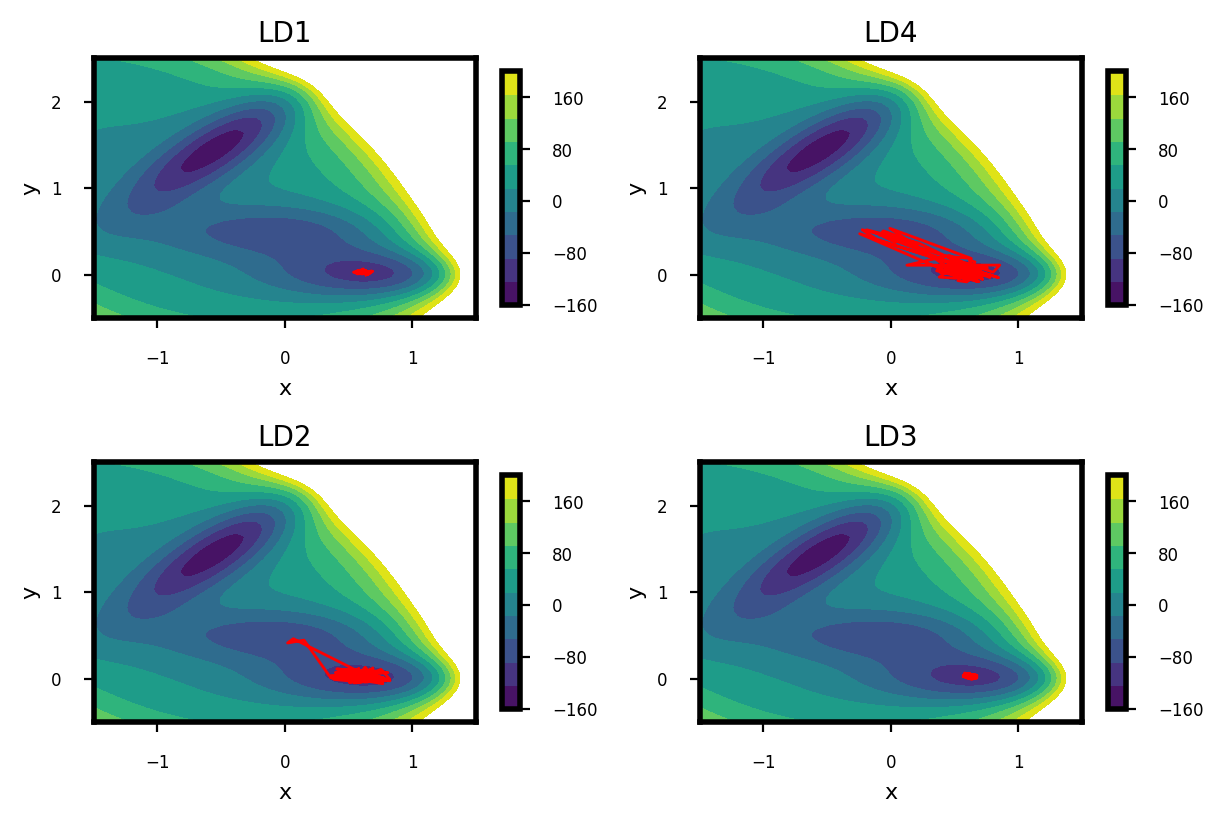

In [ ]:
vmin = -160
vmax = 200
vfreq = 80
maxsteps = 10000 # maximum number of frames in the simulations


plt.show()
levels = np.linspace(vmin, vmax, 11)

fig, axs = plt.subplots(2, 2, constrained_layout=True)

for ax, name in zip(axs.flat, datafiles):
    cp = ax.contourf(x, y, vpot, levels, vmin=vmin, vmax=vmax)
    fig.colorbar(mappable=cp, ax=ax, shrink=0.9, ticks=range(vmin, vmax+vfreq, vfreq))

    cv1 = np.empty(maxsteps)
    cv2 = np.empty(maxsteps)
    nsteps = read_colvar(name,cv1,cv2)
    ax.plot(cv1[:nsteps:100],cv2[:nsteps:100],'r')

    ax.set_title(name.strip('.dat'))
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_xlim(-1.5,1.5)
    ax.set_ylim(-0.5,2.5)
    ax.locator_params(nbins=4)

plt.show()

### Trajectory inspection
The 4 above LD dynamics have been set up with different parameters in order to sample different regions of the Muller-Brown potential.  
Of the below parameters possible to set up a LD dynamics can you state which one has been modified from the A trajectory?


1.   Number of step of the simulation (nstep)
2.   Timestep of the simulation (ts)
3.   Temperature (T)
4.   Initial configuration (x<sub>0</sub>,y<sub>0</sub>)
5.   Friction coefficient (γ)



## Overcome the barrier with Metadynamics

#### Theoretical recall on Metadynamics
We are interested in exploring the space spanned by the CVs, z<sub>i</sub>, and in quantifying the free energy. In order to do so, in metadynamics we exert a history-dependent repulsive potential by summing Gaussian kernels over time:

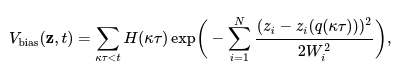  

with Gaussian height H, widths along each CV Wi, and depositing frequency τ. This bias drives the system away from already visited configurations and into new regions of CV-space. More importantly, in the long-time limit, the bias potential converges to the minus free energy as function of the CVs: Vbias(z,t→∞)=−F(z).

As a well-established sampling technique, metadynamics also has several extensions to accelerate convergence and improve computational performance, such as the multiple-walker and well-tempered versions **[1,2]**.

Metadynamics can handle a few CVs simultaneously in a trivial manner, which spares us from having to find a single perfect CV. Instead, an appropriate set of CVs allows us to converge an insightful multidimensional free energy landscape, in which (meta)stable states and connecting MFEPs can be identified. In practice however, especially when investigating complex transitions, the number of CVs is limited to N≈3, because of the exponential growth of computational cost with CV dimensionality.  
  

**[1]** *P. Raiteri, A. Laio, F. L. Gervasio, C. Micheletti, and M. Parrinello, “Efficient reconstruction of complex free energy landscapes by multiple walkers metadynamics,” J. Phys. Chem. B., vol. 110, no. 8, pp. 3533–3539, 2006.*  
**[2]** *A. Barducci, G. Bussi, and M. Parrinello, “Well-tempered metadynamics: a smoothly converging and tunable free-energy method,” Phys. Rev. Lett., vol. 100, no. 2, p. 020603, 2008.*

**Tabulated barrier to pass the saddle point is ∼100 kJ/mol**

### 1D Metadynamics


Along X

In [ ]:
##@title **Upload data**

base = "https://raw.githubusercontent.com/lianctrl/HandsOnSession27-01-23/main/First-Part/Data-Metad/"

colvarx = "X-dat/colvar.out" #@param {type:"string"}
fesx1 = "X-dat/fes-h025-4t_7.dat" #@param {type:"string"}
fesx2 = "X-dat/fes-h025-4t_8.dat" #@param {type:"string"}
fesx3 = "X-dat/fes-h025-4t_9.dat" #@param {type:"string"}

!wget -O colvarX.dat {base+colvarx} 
!wget -O fesx1.dat {base+fesx1}
!wget -O fesx2.dat {base+fesx2}
!wget -O fesx3.dat {base+fesx3}


--2023-01-26 13:57:54--  https://raw.githubusercontent.com/lianctrl/HandsOnSession27-01-23/main/First-Part/Data-Metad/X-dat/colvar.out
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 887648 (867K) [text/plain]
Saving to: ‘colvarX.dat’

colvarX.dat         100%[===================>] 866.84K  --.-KB/s    in 0.05s   

2023-01-26 13:57:54 (15.6 MB/s) - ‘colvarX.dat’ saved [887648/887648]

--2023-01-26 13:57:54--  https://raw.githubusercontent.com/lianctrl/HandsOnSession27-01-23/main/First-Part/Data-Metad/X-dat/fes-h025-4t_7.dat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request 

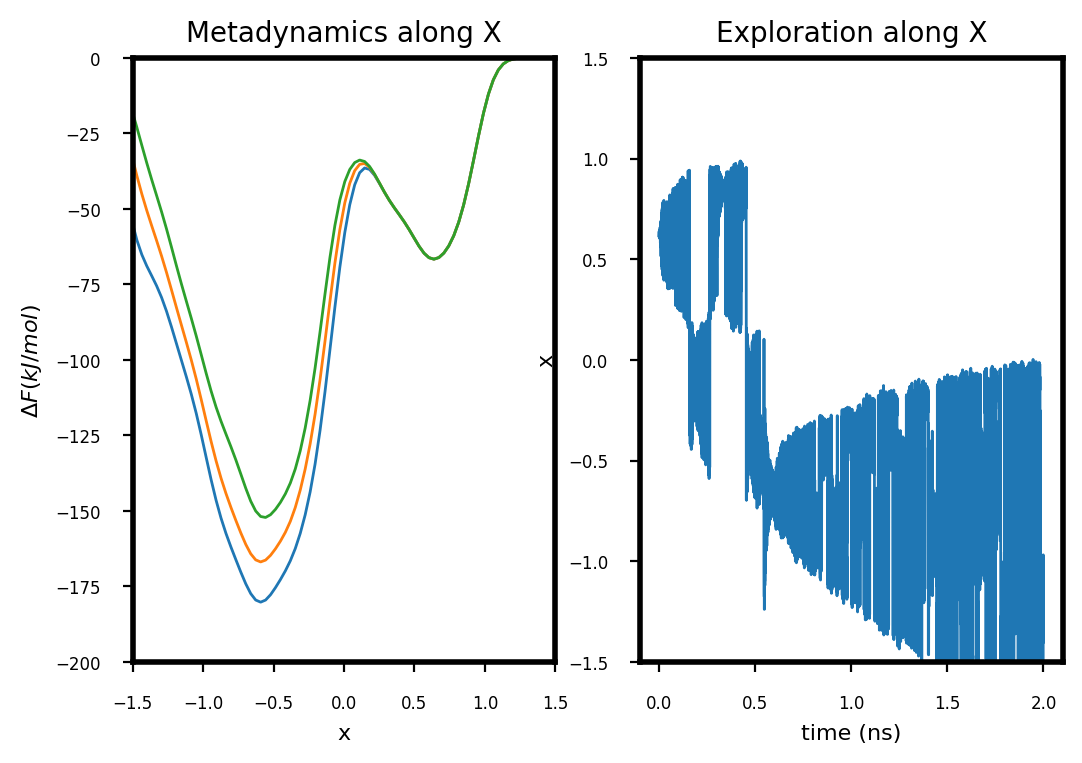

In [ ]:
datafiles=[]

for name in glob.glob('fesx*'):
    datafiles.append(name)

fig,(ax1,ax2)=plt.subplots(1,2)


for names in datafiles:
    data = np.loadtxt(names)
    ax1.plot(data[:,0],data[:,1])

ax1.set_title('Metadynamics along X')
ax1.set_xlabel('x')
ax1.set_ylabel('$\Delta F (kJ/mol)$')
ax1.set_ylim(-200,0)
ax1.set_xlim(-1.5,1.5)

datacolvar = np.loadtxt('colvarX.dat')

ax2.plot(datacolvar[:,0]*1e-6,datacolvar[:,1])
ax2.set_title('Exploration along X')
ax2.set_xlabel('time (ns)')
ax2.set_ylabel('x')
ax2.set_ylim(-1.5,1.5)
ax2.set_xlim()



plt.show()

Along Y

In [ ]:
##@title **Upload data**

base = "https://raw.githubusercontent.com/lianctrl/HandsOnSession27-01-23/main/First-Part/Data-Metad/"

colvary = "Y-dat/colvar.out" #@param {type:"string"}
fesy1 = "Y-dat/fes-h025-4t_7.dat" #@param {type:"string"}
fesy2 = "Y-dat/fes-h025-4t_8.dat" #@param {type:"string"}
fesy3 = "Y-dat/fes-h025-4t_9.dat" #@param {type:"string"}

!wget -O colvarY.dat {base+colvary} 
!wget -O fesy1.dat {base+fesy1}
!wget -O fesy2.dat {base+fesy2}
!wget -O fesy3.dat {base+fesy3}

--2023-01-26 13:58:10--  https://raw.githubusercontent.com/lianctrl/HandsOnSession27-01-23/main/First-Part/Data-Metad/Y-dat/colvar.out
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 888579 (868K) [text/plain]
Saving to: ‘colvarY.dat’

colvarY.dat         100%[===================>] 867.75K  --.-KB/s    in 0.05s   

2023-01-26 13:58:11 (15.4 MB/s) - ‘colvarY.dat’ saved [888579/888579]

--2023-01-26 13:58:11--  https://raw.githubusercontent.com/lianctrl/HandsOnSession27-01-23/main/First-Part/Data-Metad/Y-dat/fes-h025-4t_7.dat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request 

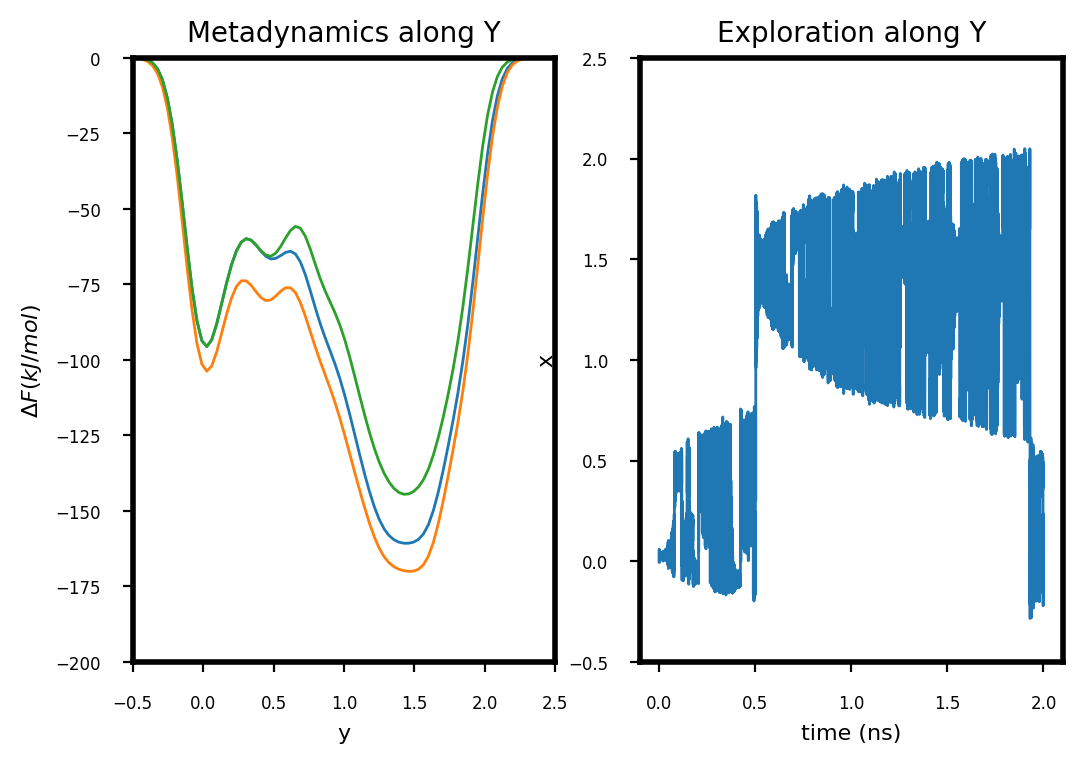

In [ ]:
datafiles=[]

for name in glob.glob('fesy*'):
    datafiles.append(name)

fig,(ax1,ax2)=plt.subplots(1,2)


for names in datafiles:
    data = np.loadtxt(names)
    ax1.plot(data[:,0],data[:,1])

ax1.set_title('Metadynamics along Y')
ax1.set_xlabel('y')
ax1.set_ylabel('$\Delta F (kJ/mol)$')
ax1.set_ylim(-200,0)
ax1.set_xlim(-0.5,2.5)

datacolvar = np.loadtxt('colvarY.dat')

ax2.plot(datacolvar[:,0]*1e-6,datacolvar[:,2])
ax2.set_title('Exploration along Y')
ax2.set_xlabel('time (ns)')
ax2.set_ylabel('y')
ax2.set_ylim(-0.5,2.5)
ax2.set_xlim()



plt.show()

### 2D Metadynamics

In [ ]:
##@title **Upload data**

base = "https://raw.githubusercontent.com/lianctrl/HandsOnSession27-01-23/main/First-Part/Data-Metad/"

colvar = "2D-dat/colvar.out" #@param {type:"string"}
fes2D = "2D-dat/fes2D.dat" #@param {type:"string"}

!wget -O colvar2D.dat {base+colvar} 
!wget -O fes2D.dat {base+fes2D}


--2023-01-26 14:21:11--  https://raw.githubusercontent.com/lianctrl/HandsOnSession27-01-23/main/First-Part/Data-Metad/2D-dat/colvar.out
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 435232 (425K) [text/plain]
Saving to: ‘colvar2D.dat’

colvar2D.dat        100%[===================>] 425.03K  --.-KB/s    in 0.04s   

2023-01-26 14:21:11 (9.50 MB/s) - ‘colvar2D.dat’ saved [435232/435232]

--2023-01-26 14:21:11--  https://raw.githubusercontent.com/lianctrl/HandsOnSession27-01-23/main/First-Part/Data-Metad/2D-dat/fes2D.dat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent

In [ ]:
try:
    filename="fes2D.dat"
    with open(filename, "r") as infile:
 
        # read grid size from header
        try:
            line = infile.readline()
            nx = int(line.split()[1])
            ny = int(line.split()[2])
            print(f"Potential grid size: {nx} x {ny}")
        except:
            print(f"Error: wrong header in file {filename}")        

        # declare arrays
        xgrid = np.empty(nx)
        ygrid = np.empty(ny)
        vpot = np.empty([ny, nx])
        
        for i in range(ny):
            for j in range(nx):
                
                line = infile.readline()
                xgrid[j], ygrid[i], vpot[i][j] = [float(val) for val in line.split()]
                
            line = infile.readline()  # read empty line

except:
    print(f"Error: Failed to open and read file {filename}")    

Potential grid size: 93 x 83


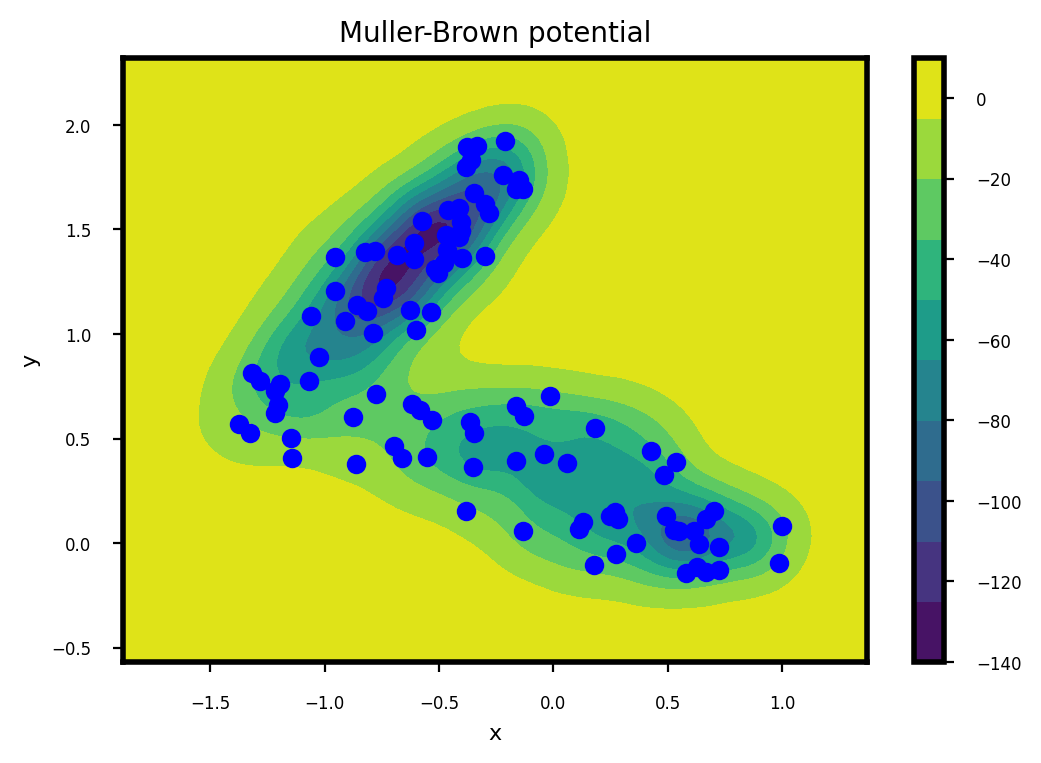

In [ ]:
vmin = -140
vmax = 10
vfreq = 20

x, y = np.meshgrid(xgrid, ygrid)
levels = np.linspace(vmin, vmax, 11)

maxsteps = 10000  # maximum number of frames in the simulations
filename = "colvar2D.dat"

cv1 = np.empty(maxsteps)
cv2 = np.empty(maxsteps)
nsteps = read_colvar(filename,cv1,cv2)

fig,ax=plt.subplots(1,1)
cp = ax.contourf(x, y, vpot, levels=levels, vmin=vmin, vmax=vmax)
fig.colorbar(mappable=cp, ticks=range(vmin, vmax+vfreq, vfreq))
ax.plot(cv1[:nsteps:100],cv2[:nsteps:100],'bo')
ax.set_title('Muller-Brown potential')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim(np.amin(x),np.amax(x))
ax.set_ylim(np.amin(y),np.amax(y))

plt.show()







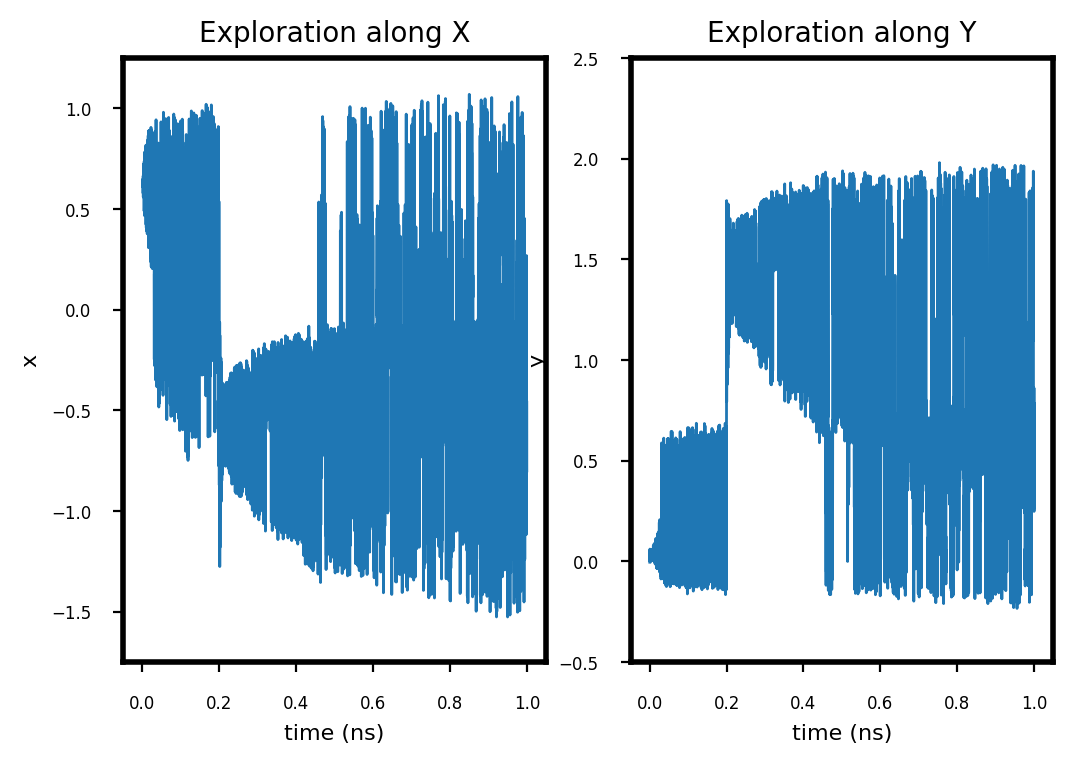

In [ ]:
datacolvar = np.loadtxt('colvar2D.dat')

fig,(ax1,ax2)=plt.subplots(1,2)

ax1.plot(datacolvar[:,0]*1e-6,datacolvar[:,1])
ax1.set_title('Exploration along X')
ax1.set_xlabel('time (ns)')
ax1.set_ylabel('x')
ax1.set_ylim(-1.75,1.25)


ax2.plot(datacolvar[:,0]*1e-6,datacolvar[:,2])
ax2.set_title('Exploration along Y')
ax2.set_xlabel('time (ns)')
ax2.set_ylabel('y')
ax2.set_ylim(-0.5,2.5)


plt.show()

### Final considerations on the exercise

### Bonus 1
The above output from metadynamics have been previously post-processed.  
There are tools to transform gaussian kernels into free energies, but one can write its own lines of code to solve the task.  
Below it can be loaded an exact output of a 1D metadynamics with 5 columns  


1.   time of the deposition of Gaussian kernel
2.   center of the Gaussian kernel deposited along the CV
3.   sigma of the Gaussian kernel deposited along the CV
4.   height of the Gaussian kernel deposited along the CV
5.   none of your interest


In [ ]:
##@title **Upload data**
base = "https://raw.githubusercontent.com/lianctrl/HandsOnSession27-01-23/main/First-Part/Data-Metad/"

HILL1D = "Bonus/HILLS1D.dat" #@param {type:"string"}


!wget -O hills1D.dat {base+HILL1D} 


--2023-01-26 15:33:12--  https://raw.githubusercontent.com/lianctrl/HandsOnSession27-01-23/main/First-Part/Data-Metad/Bonus/HILLS1D.dat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 464070 (453K) [text/plain]
Saving to: ‘hills1D.dat’

hills1D.dat         100%[===================>] 453.19K  --.-KB/s    in 0.04s   

2023-01-26 15:33:13 (10.2 MB/s) - ‘hills1D.dat’ saved [464070/464070]



### Bonus 2
Can you write the same code of Bonus 1 for a 2D metadynamics output?

1.   time of the deposition of Gaussian kernel
2.   center of the Gaussian kernel deposited along the first CV
3.   center of the Gaussian kernel deposited along the second CV
4.   sigma of the Gaussian kernel deposited along the first CV
5.   sigma of the Gaussian kernel deposited along the second CV
6.   height of the Gaussian kernel deposited along the CV
7.   none of your interest

In [ ]:
##@title **Upload data**
base = "https://raw.githubusercontent.com/lianctrl/HandsOnSession27-01-23/main/First-Part/Data-Metad/"

HILLS2D = "Bonus/HILLS2D.dat" #@param {type:"string"}


!wget -O hills2D.dat {base+HILLS2D} 

--2023-01-26 22:14:38--  https://raw.githubusercontent.com/lianctrl/HandsOnSession27-01-23/main/First-Part/Data-Metad/Bonus/HILLS2D.dat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 324086 (316K) [text/plain]
Saving to: ‘hills2D.dat’

hills2D.dat         100%[===================>] 316.49K  --.-KB/s    in 0.007s  

2023-01-26 22:14:38 (46.7 MB/s) - ‘hills2D.dat’ saved [324086/324086]



### Hints

In [ ]:
data=np.loadtxt("hills2D.dat")
time=np.around(data[:,0])  
x0 = data[:, 1]
y0 = data[:, 2]
sx = data[:, 3]
sy = data[:, 4]
h  = data[:, 5]    #usually doesn't change, in units of kJ/mol


def gaussian(x, y, x0, y0, sigma_x, sigma_y,h):
    return h*np.exp(-((x-x0)**2/(2*sigma_x**2) + (y-y0)**2/(2*sigma_y**2)))

def sum_gaussians(grid_size, xmin, xmax, ymin, ymax, gaussian_params):
    xv = np.linspace(xmin, xmax, grid_size, endpoint=True)
    yv = np.linspace(ymin, ymax, grid_size, endpoint=True)

    x, y = np.meshgrid(xv, yv)

    total = np.zeros((grid_size, grid_size))
    for param in gaussian_params:
        total += gaussian(x, y, *param)
    return x, y, total

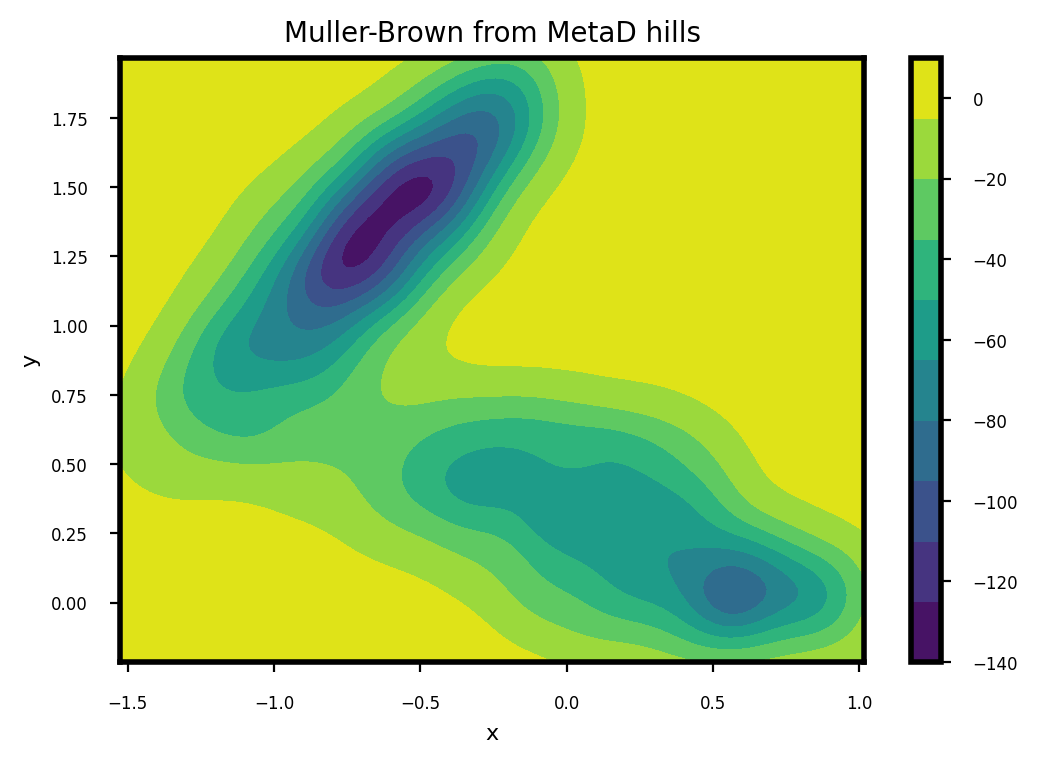

In [ ]:
grid_size = 100
gaussian_params = np.column_stack((x0,y0,sx,sy,h))
x, y, grid = sum_gaussians(grid_size,np.amin(x0),np.amax(x0), np.amin(y0), \
                           np.amax(y0), gaussian_params)

vmin = -140
vmax = 10
vfreq = 20

levels = np.linspace(vmin, vmax, 11)

fig,ax=plt.subplots(1,1)
cp = ax.contourf(x, y, -1*grid, levels=levels, vmin=vmin, vmax=vmax)
fig.colorbar(mappable=cp, ticks=range(vmin, vmax+vfreq, vfreq))
ax.set_title('Muller-Brown from MetaD hills')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim(np.amin(x),np.amax(x))
ax.set_ylim(np.amin(y),np.amax(y))

plt.show()

# Second Part
This second part would involve the study of the alanine dipeptide molecule 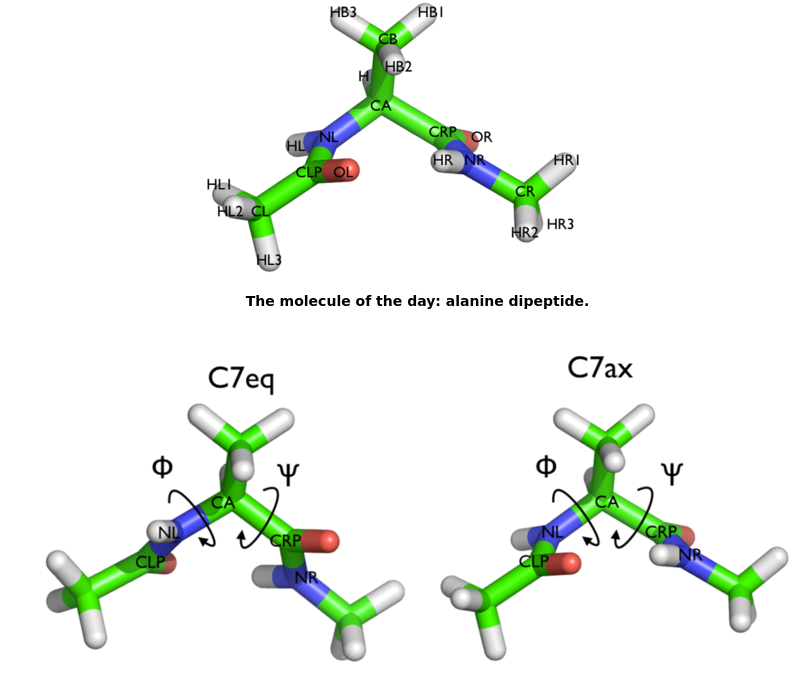

## Biasing toward psi
Once loaded the files regarding the psi CV plot the progress of the FES sampled and how much the CV has been explore

In [ ]:
##@title **Upload data**

base = "https://raw.githubusercontent.com/lianctrl/HandsOnSession27-01-23/main/Second-part/"

colvarps = "psi/COLVAR" #@param {type:"string"}
fesps1 = "psi/fes_7.dat" #@param {type:"string"}
fesps2 = "psi/fes_8.dat" #@param {type:"string"}
fesps3 = "psi/fes_9.dat" #@param {type:"string"}

!wget -O colvarps.dat {base+colvarps} 
!wget -O fesps1.dat {base+fesps1}
!wget -O fesps2.dat {base+fesps2}
!wget -O fesps3.dat {base+fesps3}

## Biasing toward phi
Once loaded the files regarding the psi CV plot the progress of the FES sampled and how much the CV has been explore

In [ ]:
##@title **Upload data**

base = "https://raw.githubusercontent.com/lianctrl/HandsOnSession27-01-23/main/Second-part/"

colvarph = "phi/COLVAR" #@param {type:"string"}
fesph1 = "phi/fes_7.dat" #@param {type:"string"}
fesph2 = "phi/fes_8.dat" #@param {type:"string"}
fesph3 = "phi/fes_9.dat" #@param {type:"string"}

!wget -O colvarps.dat {base+colvarph} 
!wget -O fesph1.dat {base+fesph1}
!wget -O fesph2.dat {base+fesph2}
!wget -O fesph3.dat {base+fesph3}

### Analyze the results
Which coordinate describes better the slow conformational changes of the alanine dipeptide and why?

## Sketch the Ramachandran plot for alanine dipeptide
Below it is loaded the 2D map of metadynamics on both torsional angles.  
Plot the 2D map alongside the exploration of the 2 CV 

In [ ]:
##@title **Upload data**

base = "https://raw.githubusercontent.com/lianctrl/HandsOnSession27-01-23/main/Second-part/"

colvarpp = "2D/COLVAR" #@param {type:"string"}
fespp = "2D/fes.dat" #@param {type:"string"}

!wget -O colvarps.dat {base+colvarpp}
!wget -O fespp.dat {base+fespp}